# Trabalho Final de Mineração de Dados

## Padrões Frequentes na Seleção de Disciplinas no CEFET-RJ

### Desenvolvimento em R

Pacotes necessários

In [1]:
install.packages('arules', repos='http://cran.us.r-project.org')
install.packages('arulesViz', repos='http://cran.us.r-project.org')
install.packages("ggplot2", repos='http://cran.us.r-project.org')
install.packages("grid", repos='http://cran.us.r-project.org')
install.packages("RColorBrewer", repos='http://cran.us.r-project.org')
install.packages("reshape", repos='http://cran.us.r-project.org')

package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Bruno\AppData\Local\Temp\RtmpkvDWcq\downloaded_packages
package 'arulesViz' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Bruno\AppData\Local\Temp\RtmpkvDWcq\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Bruno\AppData\Local\Temp\RtmpkvDWcq\downloaded_packages


Warning message:
"package 'grid' is not available (for R version 3.3.2)"Warning message:
"package 'grid' is a base package, and should not be updated"

package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Bruno\AppData\Local\Temp\RtmpkvDWcq\downloaded_packages
package 'reshape' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Bruno\AppData\Local\Temp\RtmpkvDWcq\downloaded_packages


Habilitando pacotes necessários:

In [2]:
options(repr.plot.width=4, repr.plot.height=3)
require(arules)
require(arulesViz)
require(reshape)
require(ggplot2)
require(grid)
require(RColorBrewer)


Loading required package: arules
Warning message:
"package 'arules' was built under R version 3.3.3"Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Loading required package: arulesViz
Warning message:
"package 'arulesViz' was built under R version 3.3.3"Loading required package: grid
Loading required package: reshape
Warning message:
"package 'reshape' was built under R version 3.3.3"
Attaching package: 'reshape'

The following object is masked from 'package:Matrix':

    expand

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"Loading required package: RColorBrewer


Padrão para Gráficos

In [3]:
plot.boxplot <- function(series, labx = "x", laby = "y", colors = NULL) {
  grf <- ggplot(aes(y = value, x = variable), data = series)
  if (!is.null(colors)) {
    grf <- grf + geom_boxplot(color = colors)
  }
  else {
    grf <- grf + geom_boxplot()
  }
  grf <- grf + theme_bw(base_size = 10)
  grf <- grf + theme(panel.grid.minor = element_blank()) + theme(legend.position = "bottom")
  grf <- grf + xlab(labx)
  grf <- grf + ylab(laby)
  return(grf)
}
plot.bar <- function(series, group=FALSE, colors=NULL) {
  if (group) {
    grf <- ggplot(series, aes(x, value, fill=variable)) + geom_bar(stat = "identity",position = "dodge")
    if (!is.null(colors)) {
      grf <- grf + scale_fill_manual("legend", values = colors)
    }
  }
  else {  
    grf <- ggplot(series, aes(variable, value))
    if (!is.null(colors)) {
      grf <- grf + geom_bar(stat = "identity",fill=colors)
    }
    else {  
      grf <- grf + geom_bar(stat = "identity")
    }    
  }
  grf <- grf + theme_bw(base_size = 10)
  grf <- grf + theme(panel.grid.minor = element_blank()) + theme(legend.position = "bottom")
  grf <- grf + scale_x_discrete(limits = unique(series$x))
  return(grf)
}
mycolors=c("darkblue", "red", "darkgreen", "orange", "purple", "yellow", "brown", "grey")
mycolors1=c(mycolors[1],mycolors[2],mycolors[3],mycolors[4],mycolors[5],mycolors[6])
mycolors2=c(mycolors[1],mycolors[2],mycolors[3],mycolors[4],mycolors[5])
mycolors3=c(mycolors[1],mycolors[2],mycolors[3])
mycolors4=c("darkblue", "red", "darkgreen", "orange", "purple", "yellow", "brown", "grey","black")

Carregando dataset:

In [4]:
arquivo=read.csv("http://pppro.cefet-rj.br/~breno/dataset.csv", sep = ";", h=T )

#### Análise Exploratória

##### 1) Sumário de dados

In [5]:
#'Analise Exploratoria'#
summary(arquivo) 


 UNIDADE                                                        NOME_UNIDADE 
 ANG:  819   MAR - CURSO DE ENGENHARIA DE PRODUÇÃO                    :3437  
 IT : 1570   MAR - CURSO DE ENGENHARIA MECÂNICA                       :3288  
 MAR:18915   MAR - CURSO DE ENGENHARIA CIVIL                          :3097  
 NF : 1358   MAR - CURSO DE ADMINISTRAÇÃO INDUSTRIAL                  :2204  
 PET: 1464   IT - CURSO DE ENGENHARIA HABILITAÇÃO INDUSTRIAL  MECÂNICA:1570  
             MAR - CURSO DE ENGENHARIA  ELÉTRICA                      :1294  
             (Other)                                                  :9236  
    DT_SOLICITACAO       DT_PROCESS     COD_DISCIPLINA 
 14/01/2016:13027             : 2524   GEXT7303:  467  
 15/01/2016: 5160   21/01/2016:21602   GEXT7502:  427  
 17/01/2016: 1704                      GEXT7401:  420  
 18/01/2016: 1704                      GEXT7302:  412  
 19/01/2016: 1439                      GEDA7601:  370  
 20/01/2016:  722                      G

##### 2) Gráficos das Variáveis Categóricas

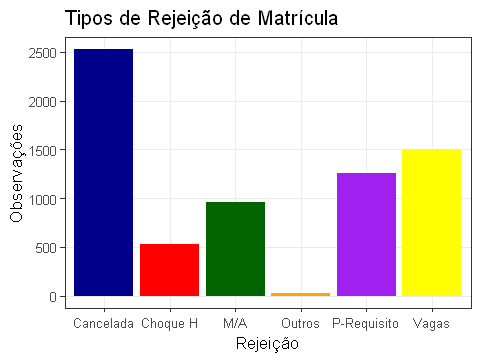

In [11]:
#'Variaveis Categoricas - Graficos de Barras'#

#'Variavel SITUACAO'#
dataset_bar1 <- function() {
  series <- matrix(nrow=6, ncol=2)
  series[1,] = c("Cancelada", 2524)
  series[2,] = c("Vagas", 1508)
  series[3,] = c("P-Requisito", 1262)
  series[4,] = c("M/A", 962)
  series[5,] = c("Choque H", 532)
  series[6,] = c("Outros", 29)
  series <- data.frame(variable=as.factor(series[,1]), value=as.double(series[,2]))  
  return(series)
}
series <- dataset_bar1()
grf1 <- plot.bar(series, colors=mycolors1)+ ggtitle("Tipos de Rejeição de Matrícula")+xlab("Rejeição") +ylab("Observações")
grf1


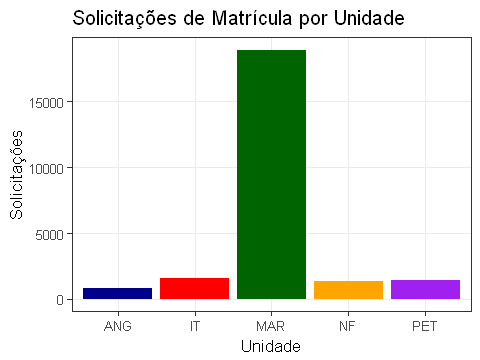

In [12]:
#'Variavel UNIDADE'#
dataset_bar2 <- function() {
  series <- matrix(nrow=5, ncol=2)
  series[1,] = c("ANG", 819)
  series[2,] = c("IT", 1570)
  series[3,] = c("MAR", 18915)
  series[4,] = c("NF", 1358)
  series[5,] = c("PET", 1464)
  series <- data.frame(variable=as.factor(series[,1]), value=as.double(series[,2]))  
  return(series)
}
series <- dataset_bar2()
grf2 <- plot.bar(series, colors=mycolors2)+ ggtitle("Solicitações de Matrícula por Unidade")+xlab("Unidade") +ylab("Solicitações")
grf2


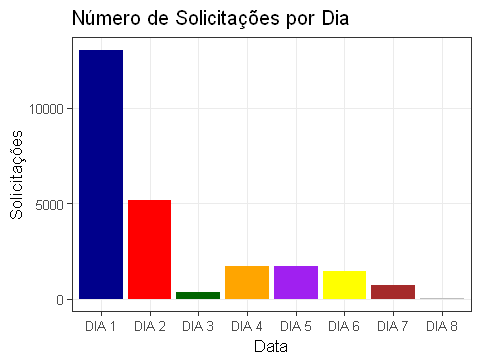

In [13]:
#'Variavel DT_SOLICITACAO'#
dataset_bar3 <- function() {
  series <- matrix(nrow=8, ncol=2)
  series[1,] = c("DIA 1", 13027)
  series[2,] = c("DIA 2", 5160)
  series[3,] = c("DIA 3", 346)
  series[4,] = c("DIA 4", 1704)
  series[5,] = c("DIA 5", 1704)
  series[6,] = c("DIA 6", 1439)
  series[7,] = c("DIA 7", 722)
  series[8,] = c("DIA 8", 24)
  series <- data.frame(variable=as.factor(series[,1]), value=as.double(series[,2]))  
  return(series)
}
series <- dataset_bar3()
grf3 <- plot.bar(series, colors=mycolors)+ ggtitle("Número de Solicitações por Dia")+xlab("Data") +ylab("Solicitações")
grf3

#'Variaveis Categoricas'#


##### 3) Gráficos das Variáveis Numéricas

[1] "Histograma"

[1] "Q-Q Norm"

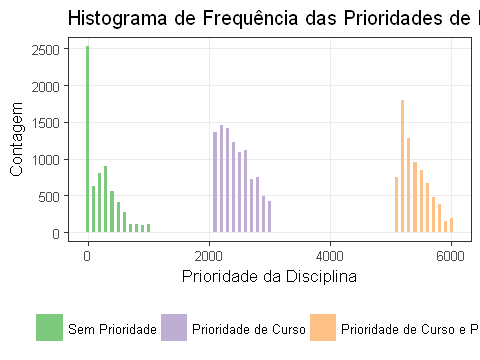

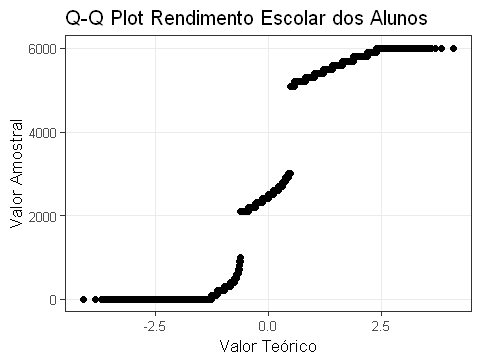

In [14]:
#'Variaveis Nao-Categoricas'#

#'Variavel PRIOR_DISC'#
a=data.frame(arquivo$PRIOR_DISC, arquivo$ORDEM_MATR)
x=function(a){
  #Discretizacao de Fatores - Faixas de PRIOR_DISC#
  a$fS2=cut(a$arquivo.PRIOR_DISC, c(0,2000,5000,6000), include.lowest = T)#, include.lowest = T
  table(a$fS2)
  a$fS2=factor(as.numeric(a$fS2),levels = 1:3)
  levels(a$fS2)=c("Sem Prioridade","Prioridade de Curso","Prioridade de Curso e Periodo")
  
  return(a)
}
a=x(a)

'Histograma'
p1 <- ggplot(a, aes(x = a$arquivo.PRIOR_DISC, fill=a$fS2)) +
  geom_histogram(aes(y = ..count..),binwidth = 50)+
  scale_x_continuous(name = "Prioridade da Disciplina") +
  scale_y_continuous(name = "Contagem")+
  ggtitle("Histograma de Frequência das Prioridades de Disciplina")+
  theme_bw(base_size = 10) +
  theme(panel.grid.minor = element_blank()) + theme(legend.position = "bottom")+
  scale_fill_brewer(palette="Accent")+
  labs(fill="")
p1

'Q-Q Norm'
p2 <- ggplot(arquivo, aes(sample = PRIOR_DISC))+
  xlab("Valor Teórico") +ylab("Valor Amostral")+
  ggtitle("Q-Q Plot Rendimento Escolar dos Alunos")+
  theme_bw(base_size = 10)+
  theme(panel.grid.minor = element_blank()) + theme(legend.position = "bottom")
p2 + stat_qq()


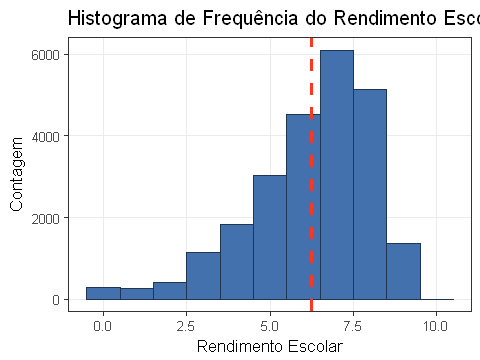

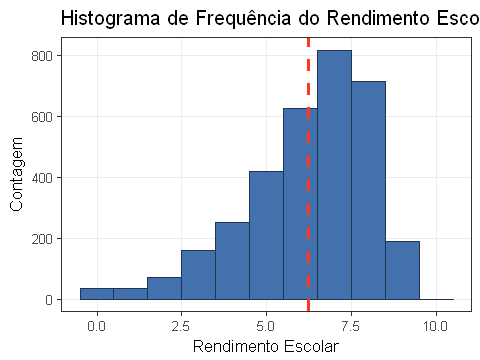

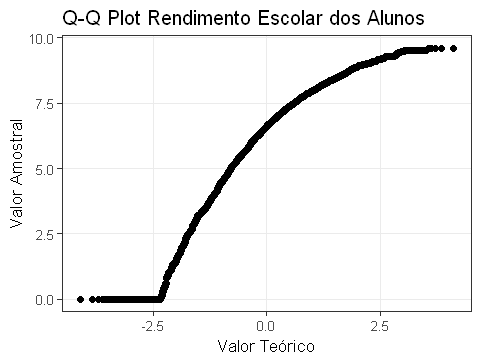

In [15]:
#'Variavel ORDEM_MATR'#

#'Histograma'
barfill <- "#4271AE"
barlines <- "#1F3552"
p3 <- ggplot(arquivo, aes(x = ORDEM_MATR)) +
  geom_histogram(aes(y = ..count..),binwidth = 1, colour = barlines, fill = barfill)+
  scale_x_continuous(name = "Rendimento Escolar") +
  scale_y_continuous(name = "Contagem")+
  ggtitle("Histograma de Frequência do Rendimento Escolar")+
  theme_bw(base_size = 10)+
  theme(panel.grid.minor = element_blank()) + theme(legend.position = "bottom")+
  geom_vline(xintercept = mean(arquivo$ORDEM_MATR), size = 1, colour = "#FF3721",
             linetype = "dashed")
p3

#'Histograma Corrigido'

#Separando valores de CR repetidos#
cr=data.frame(arquivo$ORDEM_MATR,arquivo$MATR_ALUNO)
c=1
for(a in cr$arquivo.MATR_ALUNO){
  if(a==cr$arquivo.MATR_ALUNO[c+1]){
    cr$cr_ajustado[c]=T
  }else{
    cr$cr_ajustado[c]=F
  }
  c=c+1
  if(c==24126){
    cr$cr_ajustado[c]=F
    break;
  }
}
#Separando valores de CR repetidos#

t=data.frame(cr$arquivo.ORDEM_MATR[cr$cr_ajustado==F])

p4 <- ggplot(t, aes(x = cr.arquivo.ORDEM_MATR.cr.cr_ajustado....F.)) +
  geom_histogram(aes(y = ..count..),binwidth = 1, colour = barlines, fill = barfill)+
  scale_x_continuous(name = "Rendimento Escolar") +
  scale_y_continuous(name = "Contagem")+
  ggtitle("Histograma de Frequência do Rendimento Escolar Corrigido")+
  theme_bw(base_size = 10)+
  theme(panel.grid.minor = element_blank()) + theme(legend.position = "bottom")+
  geom_vline(xintercept = mean(t$cr.arquivo.ORDEM_MATR.cr.cr_ajustado....F.), size = 1, colour = "#FF3721",
             linetype = "dashed")
p4

#'Q-Q Norm'
p5 <- ggplot(arquivo, aes(sample = ORDEM_MATR))+
  xlab("Valor Teórico") +ylab("Valor Amostral")+
  ggtitle("Q-Q Plot Rendimento Escolar dos Alunos")+
  theme_bw(base_size = 10)+
  theme(panel.grid.minor = element_blank()) + theme(legend.position = "bottom")
p5 + stat_qq()


O atributo ORDEM_MATR que se refere ao CR de cada aluno possui valores repetidos, uma vez que cada aluno faz mais de uma solicitação de disciplina. Portanto é necessário preprocessar os dados de ORDEM_MATR filtrando os valores de matrícula repetidos (MATR_ALUNO). Entretanto, não houve mudança significativa com este preprocessamento!

[1] "Coeficiente de Correlacao de Pearson"

[1] 0.2076281

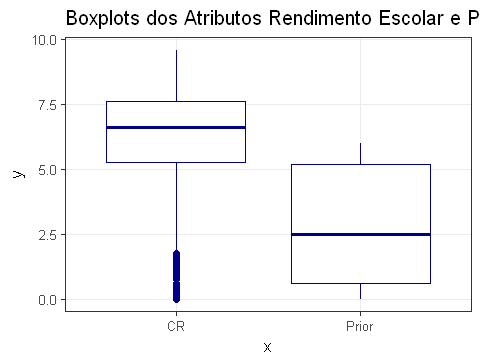

In [16]:
#'Variavel ORDEM_MATR e PRIOR_DISC'#

#'Boxplots'
dataset_series <- function() {
  series <- data.frame(x= 1:24126, CR=arquivo$ORDEM_MATR, Prior=(arquivo$PRIOR_DISC)/1000)
  series <- melt(series[,c('x','CR', 'Prior')],id.vars = 1)
  return(series)  
}
series = dataset_series()
grf4 <- plot.boxplot(series, colors=mycolors[1])+ggtitle("Boxplots dos Atributos Rendimento Escolar e Prioridade de Disciplina")
grf4

'Coeficiente de Correlacao de Pearson'
cor(arquivo$PRIOR_DISC,arquivo$ORDEM_MATR)

#'Variaveis Nao-Categoricas'#

#'Analise Exploratoria'#


#### Preprocessamento de Dados

##### 1) Remoção de Outliers

In [17]:
#'Preprocessamento'

#'Removendo Outliers - Atributo ORDEM_MATR'
lim=mean(arquivo$ORDEM_MATR)-3*sd(arquivo$ORDEM_MATR)
c=1
for(a in arquivo$ORDEM_MATR){
  if(a<lim){
    arquivo=arquivo[-c(c),]
  }
  c=c+1
}
#'Removendo Outliers - Atributo ORDEM_MATR'


##### 2) Discretização

In [18]:
#'Discretizacao'
arquivo_p1=data.frame(arquivo)
discret=function(a){
  #Discretizacao de Fatores - Faixas de PRIOR_DISC#
  a$fPRIOR_DISC=cut(a$PRIOR_DISC, c(0,2000,5000,6000), include.lowest = T)#, include.lowest = T
  table(a$fPRIOR_DISC)
  a$fPRIOR_DISC=factor(as.numeric(a$fPRIOR_DISC),levels = 1:3)
  levels(a$fPRIOR_DISC)=c("Sem Prioridade","Prioridade de Curso","Prioridade de Curso e Periodo")
  a$PRIOR_DISC=NULL
  #Discretizacao de Fatores - Faixas de PRIOR_DISC#

  #Discretizacao de Fatores - Faixas de ORDER_MATR (CR)#
  a$fORDEM_MATR=cut(a$ORDEM_MATR, quantile(a$ORDEM_MATR,(0:4)/4), labels = F, include.lowest = T)#, include.lowest = T
  table(a$fORDEM_MATR)
  a$fORDEM_MATR=factor(as.numeric(a$fORDEM_MATR),levels = 1:4)
  levels(a$fORDEM_MATR)=c("D","C","B","A")
  a$ORDEM_MATR=NULL
  #Discretizacao de Fatores - Faixas de ORDER_MATR (CR)#
  
  return(a)
}
arquivo_p1=discret(arquivo_p1)
#'Discretizacao'


##### 3) Redução de Dimensionalidade

In [19]:
#'Reducao de Dimensionalidade'
arquivo_p1$DT_PROCESS=NULL
arquivo_p1$SITUACAO_ITEM=NULL #'Idem a Situacao'
arquivo_p1$ANO=NULL
arquivo_p1$PERIODO=NULL
arquivo_p1$IND_GERADA=NULL
arquivo_p1$ANO=NULL
arquivo_p1$ID_PROCESSAMENTO=NULL
#'Reducao de Dimensionalidade'

#'Preprocessamento'

arquivo_p1$PERIODO_IDEAL=as.factor(arquivo_p1$PERIODO_IDEAL)
arquivo_p1$PRIOR_TURMA=as.factor(arquivo_p1$PRIOR_TURMA)


##### Nova Análise Exploratória

##### Sumário de Dados

In [20]:
#Analise Exploratoria 2#
summary(arquivo_p1)

 UNIDADE                                                        NOME_UNIDADE 
 ANG:  810   MAR - CURSO DE ENGENHARIA DE PRODUÇÃO                    :3417  
 IT : 1533   MAR - CURSO DE ENGENHARIA MECÂNICA                       :3212  
 MAR:18679   MAR - CURSO DE ENGENHARIA CIVIL                          :3097  
 NF : 1341   MAR - CURSO DE ADMINISTRAÇÃO INDUSTRIAL                  :2141  
 PET: 1443   IT - CURSO DE ENGENHARIA HABILITAÇÃO INDUSTRIAL  MECÂNICA:1533  
             MAR - CURSO DE ENGENHARIA  ELÉTRICA                      :1289  
             (Other)                                                  :9117  
    DT_SOLICITACAO   COD_DISCIPLINA                          NOME_DISCIPLINA 
 14/01/2016:12845   GEXT7303:  462   EQUAÇÕES DIFERENCIAIS ORDINÁRIAS:  572  
 15/01/2016: 5087   GEXT7502:  421   ÁLGEBRA LINEAR II               :  542  
 17/01/2016: 1690   GEXT7401:  417   CÁLCULO A VÁRIAS VARIÁVEIS      :  504  
 18/01/2016: 1685   GEXT7302:  410   COMPUTAÇÃO                 

##### Gráficos de Variáveis Discretizadas

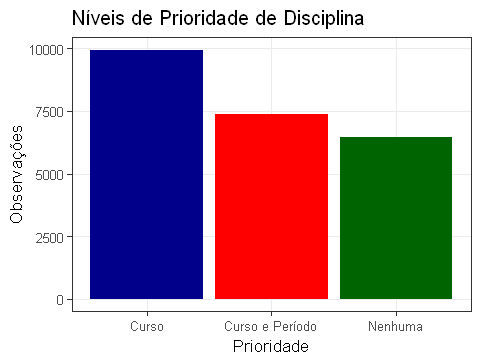

In [21]:
#'Variavel fPRIOR_DISC'#
dataset_bar4 <- function() {
  series <- matrix(nrow=3, ncol=2)
  series[1,] = c("Nenhuma", 6480)
  series[2,] = c("Curso", 9949)
  series[3,] = c("Curso e Período", 7377)
  series <- data.frame(variable=as.factor(series[,1]), value=as.double(series[,2]))  
  return(series)
}
series <- dataset_bar4()
grf5 <- plot.bar(series, colors=mycolors3)+ ggtitle("Níveis de Prioridade de Disciplina")+xlab("Prioridade") +ylab("Observações")
grf5

#Analise Exploratoria 2#

#### Função de Mineração

##### Padrões Frequentes

###### Regras encontradas

In [22]:
#Padroes Frequentes#
aTrans = as(arquivo_p1, "transactions")
rules=apriori(aTrans, list(supp=0.001, conf=0.1, maxlen=4), appearance=list(rhs=c("SITUACAO=Rejeitada/Choque de Horário"), default="lhs"))
rules_c=as(rules, "data.frame")

aTrans = as(arquivo_p1, "transactions")
rules=apriori(aTrans, list(supp=0.001, conf=0.1, maxlen=4), appearance=list(rhs=c("SITUACAO=Rejeitada/Falta de Pré-Requisito"), default="lhs"))
rules_d=as(rules, "data.frame")

aTrans = as(arquivo_p1, "transactions")
rules=apriori(aTrans, list(supp=0.001, conf=0.1, maxlen=4), appearance=list(rhs=c("SITUACAO=Rejeitada/Falta de Vagas"), default="lhs"))
rules_e=as(rules, "data.frame")

choque<-rules_c[!duplicated(rules_c$lift), ]
requisito<-rules_d[!duplicated(rules_d$lift), ]
vagas<-rules_e[!duplicated(rules_e$lift), ]

requisito=requisito[requisito$confidence>=0.3,]
vagas=vagas[vagas$confidence>=0.5,]
o = order(vagas$confidence, decreasing = T)
vagas.sorted=vagas[o,]

regras1=vagas.sorted[-c(3,4,6,25,27,31,32,34,39,46,48,52,53,54,57,58,66,69,72,74,75,76,82),]

regras2=subset(requisito, confidence>=0.36)
regras2=regras2[-c(2),]

o = order(regras2$confidence, decreasing = T)
regras2=regras2[o,]

regras=rbind(regras1,regras2)
o = order(regras$confidence, decreasing = T)
regras=regras[o,]

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
      4  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 23 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[11009 item(s), 23806 transaction(s)] done [0.03s].
sorting and recoding items ... [1146 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4

Warning message in apriori(aTrans, list(supp = 0.001, conf = 0.1, maxlen = 4), appearance = list(rhs = c("SITUACAO=Rejeitada/Choque de Horário"), :
"Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!"

 done [0.14s].
writing ... [20 rule(s)] done [0.02s].
creating S4 object  ... done [0.01s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
      4  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 23 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[11009 item(s), 23806 transaction(s)] done [0.03s].
sorting and recoding items ... [1146 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4

Warning message in apriori(aTrans, list(supp = 0.001, conf = 0.1, maxlen = 4), appearance = list(rhs = c("SITUACAO=Rejeitada/Falta de Pré-Requisito"), :
"Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!"

 done [0.13s].
writing ... [431 rule(s)] done [0.02s].
creating S4 object  ... done [0.01s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
      4  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 23 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[11009 item(s), 23806 transaction(s)] done [0.05s].
sorting and recoding items ... [1146 item(s)] done [0.01s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4

Warning message in apriori(aTrans, list(supp = 0.001, conf = 0.1, maxlen = 4), appearance = list(rhs = c("SITUACAO=Rejeitada/Falta de Vagas"), :
"Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!"

 done [0.18s].
writing ... [1859 rule(s)] done [0.02s].
creating S4 object  ... done [0.01s].


###### Regras Geradas

In [23]:
esperado=regras[c(1,8,12,14,15,17,24),]

turma=regras[c(6,16,20,22,32,34,36,41,51,55,63),]
o = order(turma$lift, decreasing = T)
turma=turma[o,]
dataset_bar6 <- function() {
  series <- matrix(nrow=9, ncol=2)
  series[1,] = c("405959", turma$lift[1])
  series[2,] = c("1000IT", turma$lift[3])
  series[3,] = c("101027", turma$lift[4])
  series[4,] = c("106699", turma$lift[5])
  series[5,] = c("400001", turma$lift[6])
  series[6,] = c("1003IT", turma$lift[7])
  series[7,] = c("145", turma$lift[8])
  series[8,] = c("930001", turma$lift[9])
  series[9,] = c("490001", turma$lift[10])
  series <- data.frame(variable=as.factor(series[,1]), value=as.double(series[,2]))  
  return(series)
}
series <- dataset_bar6()
grf6 <- plot.bar(series, colors=mycolors4)+xlab("Turma") +ylab("Lift")

interessante=regras[c(5,11,21,26,29,31,38,39,42,48,65),]


Regras de associação esperadas

In [24]:
esperado

,rules,support,confidence,lift
823,"{COD_TURMA=1206IT,fPRIOR_DISC=Prioridade de Curso,fORDEM_MATR=D} => {SITUACAO=Rejeitada/Falta de Vagas}",0.001050155,1.0000000,15.97718
101,"{COD_DISCIPLINA=GEXT7301IT,fORDEM_MATR=D} => {SITUACAO=Rejeitada/Falta de Vagas}",0.001344199,0.7804878,12.47000
945,"{COD_DISCIPLINA=GEXT7501,fPRIOR_DISC=Prioridade de Curso e Periodo,fORDEM_MATR=D} => {SITUACAO=Rejeitada/Falta de Vagas}",0.001092162,0.7647059,12.21784
93,"{COD_TURMA=145,fPRIOR_DISC=Sem Prioridade} => {SITUACAO=Rejeitada/Falta de Vagas}",0.001092162,0.7428571,11.86876
22,"{COD_TURMA=405959,fPRIOR_DISC=Prioridade de Curso} => {SITUACAO=Rejeitada/Falta de Pré-Requisito}",0.001260187,0.7317073,13.96874
114,"{COD_TURMA=101027,fORDEM_MATR=D} => {SITUACAO=Rejeitada/Falta de Vagas}",0.001092162,0.7222222,11.53908
919,"{COD_TURMA=930001,fPRIOR_DISC=Sem Prioridade,fORDEM_MATR=C} => {SITUACAO=Rejeitada/Falta de Vagas}",0.001008149,0.6857143,10.95578


Regras de associação interessantes - lenght ==1

In [25]:
turma

,rules,support,confidence,lift
12,{COD_TURMA=405959} => {SITUACAO=Rejeitada/Falta de Pré-Requisito},0.001260187,0.6976744,13.319035
94,"{UNIDADE=MAR,COD_TURMA=145} => {SITUACAO=Rejeitada/Falta de Vagas}",0.001092162,0.7878788,12.588082
8,{COD_DISCIPLINA=GEXT7301IT} => {SITUACAO=Rejeitada/Falta de Vagas},0.001344199,0.7272727,11.619768
10,{COD_TURMA=101027} => {SITUACAO=Rejeitada/Falta de Vagas},0.001302193,0.7045455,11.256650
2,{COD_DISCIPLINA=GMEC7606} => {SITUACAO=Rejeitada/Falta de Vagas},0.001134168,0.6428571,10.271045
1,{COD_TURMA=400001} => {SITUACAO=Rejeitada/Falta de Vagas},0.001092162,0.6341463,10.131871
5,{COD_DISCIPLINA=GEXT7702IT} => {SITUACAO=Rejeitada/Falta de Vagas},0.001134168,0.6279070,10.032184
7,{COD_TURMA=145} => {SITUACAO=Rejeitada/Falta de Vagas},0.001092162,0.6046512,9.660621
25,{COD_TURMA=930001} => {SITUACAO=Rejeitada/Falta de Vagas},0.002772410,0.5454545,8.714826
11,{COD_TURMA=490001} => {SITUACAO=Rejeitada/Falta de Vagas},0.001050155,0.5319149,8.498501


Regras de associação interessantes - lenght <4

In [26]:
interessante

,rules,support,confidence,lift
1551,"{PERIODO_IDEAL=1,COD_CURSO=GPROD,fPRIOR_DISC=Prioridade de Curso e Periodo} => {SITUACAO=Rejeitada/Falta de Vagas}",0.002058305,0.8032787,12.834129
1538,"{PERIODO_IDEAL=1,PRIOR_TURMA=1,COD_CURSO=GPROD} => {SITUACAO=Rejeitada/Falta de Vagas}",0.001512224,0.7659574,12.237841
212,"{COD_DISCIPLINA=GEXT7501,fPRIOR_DISC=Prioridade de Curso e Periodo} => {SITUACAO=Rejeitada/Falta de Vagas}",0.001092162,0.7027027,11.227208
1091,"{NOME_DISCIPLINA=CÁLCULO A UMA VARIÁVEL,fPRIOR_DISC=Prioridade de Curso e Periodo,fORDEM_MATR=D} => {SITUACAO=Rejeitada/Falta de Vagas}",0.002352348,0.6746988,10.779785
1033,"{COD_DISCIPLINA=GEXT7301,fPRIOR_DISC=Prioridade de Curso e Periodo,fORDEM_MATR=D} => {SITUACAO=Rejeitada/Falta de Vagas}",0.001302193,0.6458333,10.318596
223,"{NOME_DISCIPLINA=ÁLGEBRA LINEAR I,fPRIOR_DISC=Prioridade de Curso e Periodo} => {SITUACAO=Rejeitada/Falta de Vagas}",0.001596236,0.6440678,10.290388
1576,"{UNIDADE=MAR,PERIODO_IDEAL=1,fPRIOR_DISC=Prioridade de Curso} => {SITUACAO=Rejeitada/Falta de Vagas}",0.003150466,0.6198347,9.903211
340,"{NOME_UNIDADE=MAR - CURSO SUPERIOR DE TECNOLOGIA EM SISTEMAS PARA INTERNET,PERIODO_IDEAL=1} => {SITUACAO=Rejeitada/Falta de Vagas}",0.001764261,0.6176471,9.868259
1183,"{COD_DISCIPLINA=GEDA7601,COD_CURSO=GPROD,fPRIOR_DISC=Prioridade de Curso} => {SITUACAO=Rejeitada/Falta de Vagas}",0.001344199,0.6037736,9.646600
60,"{PERIODO_IDEAL=5,COD_CURSO=WEB} => {SITUACAO=Rejeitada/Falta de Pré-Requisito}",0.001344199,0.5614035,10.717540


###### Gráficos Gerados

Análise lift das regras contendo código da turma como antecedente e rejeição de vaga como consequente

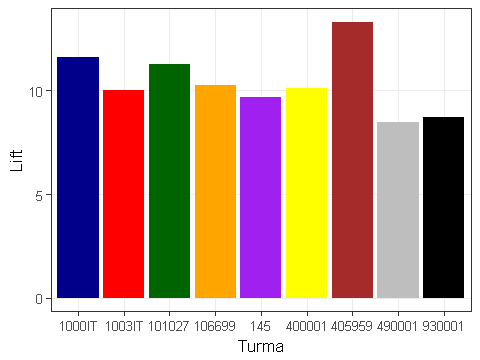

In [27]:
grf6